In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:
df = pd.read_csv("data/cleaned_stud.csv")

In [7]:
df.head()

,Unnamed: 0,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Average
0,0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,1,female,group C,some college,standard,completed,69,90,88,82.333333
2,2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,4,male,group C,some college,standard,none,76,78,75,76.333333


In [8]:
df.drop("Unnamed: 0" , axis=1 , inplace=True)

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [10]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

In [11]:
scaler = StandardScaler()
ohe = OneHotEncoder()

num_features = df.select_dtypes(exclude="object").columns
cat_features = df.select_dtypes(include="object").columns
print(cat_features)
transformer = ColumnTransformer([
    ("OneHotEncoder" , ohe , cat_features) ,
    ("StandardScaler" , scaler , num_features)
])

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


In [12]:
transformed_data = transformer.fit_transform(df)

In [13]:
transformed_data.shape

(1000, 21)

In [20]:
cols = [feature.split("__" , 1)[1] for feature in transformer.get_feature_names_out()]
print(cols)

['gender_female', 'gender_male', 'race_ethnicity_group A', 'race_ethnicity_group B', 'race_ethnicity_group C', 'race_ethnicity_group D', 'race_ethnicity_group E', "parental_level_of_education_associate's degree", "parental_level_of_education_bachelor's degree", 'parental_level_of_education_high school', "parental_level_of_education_master's degree", 'parental_level_of_education_some college', 'parental_level_of_education_some high school', 'lunch_free/reduced', 'lunch_standard', 'test_preparation_course_completed', 'test_preparation_course_none', 'math_score', 'reading_score', 'writing_score', 'Average']


In [23]:
X_scaled = pd.DataFrame(transformed_data , columns=cols)

In [24]:
X_scaled.head()

,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none,math_score,reading_score,writing_score,Average
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.390024,0.193999,0.391492,0.343574
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.192076,1.427476,1.313269,1.021927
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.577711,1.770109,1.642475,1.747064
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.259543,-0.833899,-1.583744,-1.293830
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.653954,0.605158,0.457333,0.600881


#### Splitting the data into train data and test data .

In [27]:
from sklearn.model_selection import train_test_split 
X = X_scaled.drop("Average" , axis=1)
y = X_scaled["Average"]

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=.2 , random_state=10)

### Model training

In [28]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

In [29]:
def evaluate(true , pred) :
    mae = mean_absolute_error(true , pred)
    mse = mean_squared_error(true , pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(true , pred)
    return mae , mse , rmse , r2 

In [30]:
models = {
    "Linear Regression" : LinearRegression() ,
    "Lasso Regression" : Lasso() ,
    "Ridge Regression" : Ridge() ,
    "Decision Tree" : DecisionTreeRegressor() ,
    "Random Forest" : RandomForestRegressor() ,
    "XGBoost" : XGBRegressor()
}
r2_lst = []

In [34]:
for i in range(len(list(models))) :
    model = list(models.values())[i]
    model.fit(X_train , y_train)

    ### Predictions for the training 
    y_train_pred = model.predict(X_train)
    mae_train , mse_train , rmse_train , r2_train = evaluate(y_train , y_train_pred)

    ### Predictions for the test data 
    y_test_pred = model.predict(X_test)
    mae_test , mse_test , rmse_test , r2_test = evaluate(y_test , y_test_pred)
    r2_lst.append(r2_test)
    ### Displaying the results 
    print(list(models.keys())[i])
    print("Results for Train data")
    print("Mean Absolute Error : {:.3f}%".format(mae_train * 100))
    print("Mean squared Error : {:.3f}%".format(mse_train * 100))
    print("Root Squared Error : {:.3f}%".format(rmse_train * 100))
    print("R2 Score : {:.3f}%".format(r2_train * 100))
    print("-" * 35)
    print("Results for Test Data")
    print("Mean Absolute Error : {:.3f}%".format(mae_test * 100))
    print("Mean squared Error : {:.3f}%".format(mse_test * 100))
    print("Root Squared Error : {:.3f}%".format(rmse_test * 100))
    print("R2 Score : {:.3f}%".format(r2_test * 100))
    print("=" * 35)
    print("\n")

Linear Regression
Results for Train data
Mean Absolute Error : 0.000%
Mean squared Error : 0.000%
Root Squared Error : 0.000%
R2 Score : 100.000%
-----------------------------------
Results for Test Data
Mean Absolute Error : 0.000%
Mean squared Error : 0.000%
Root Squared Error : 0.000%
R2 Score : 100.000%


Lasso Regression
Results for Train data
Mean Absolute Error : 79.757%
Mean squared Error : 100.199%
Root Squared Error : 100.100%
R2 Score : 0.000%
-----------------------------------
Results for Test Data
Mean Absolute Error : 80.946%
Mean squared Error : 99.365%
Root Squared Error : 99.682%
R2 Score : -0.819%


Ridge Regression
Results for Train data
Mean Absolute Error : 0.044%
Mean squared Error : 0.000%
Root Squared Error : 0.055%
R2 Score : 100.000%
-----------------------------------
Results for Test Data
Mean Absolute Error : 0.044%
Mean squared Error : 0.000%
Root Squared Error : 0.056%
R2 Score : 100.000%


Decision Tree
Results for Train data
Mean Absolute Error : 0.000

In [36]:
results = pd.DataFrame(zip(models , r2_lst) , columns=["Models" , "R2 Score"]).sort_values(by="R2 Score" , ascending=False)

In [37]:
results

,Models,R2 Score
0,Linear Regression,1.000000
2,Ridge Regression,1.000000
5,XGBoost,0.997079
4,Random Forest,0.996690
3,Decision Tree,0.990173
1,Lasso Regression,-0.008192


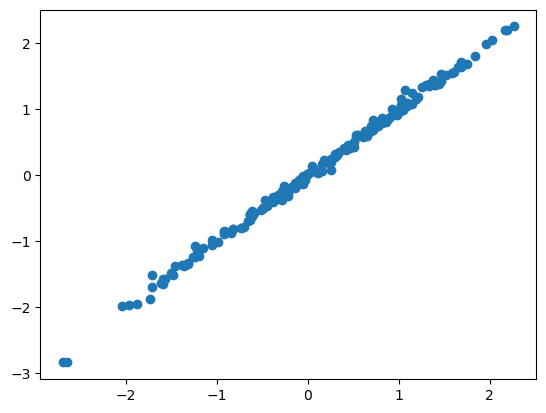

In [39]:
plt.scatter(y_test , y_test_pred)

In [40]:
sns.regplot(y_test , y_test_pred)

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

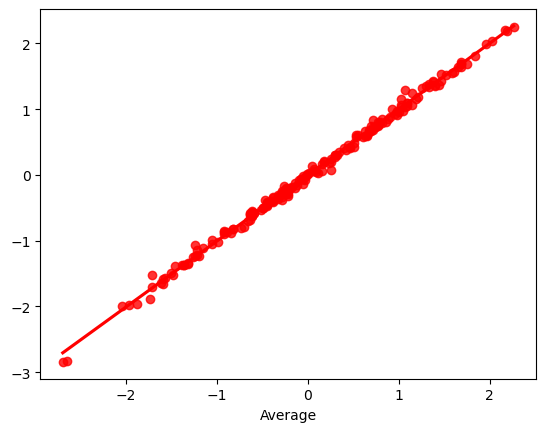

In [41]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='red');